In [263]:
import pmdarima as pmd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from datetime import datetime, date, timedelta

# 2. 

In [2]:
stk = pd.read_csv("data/tsibbledata/gafa_stock.csv")
stk.Date = pd.to_datetime(stk.Date)

In [21]:
amzn = stk.query("Symbol=='AMZN'")

/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


''

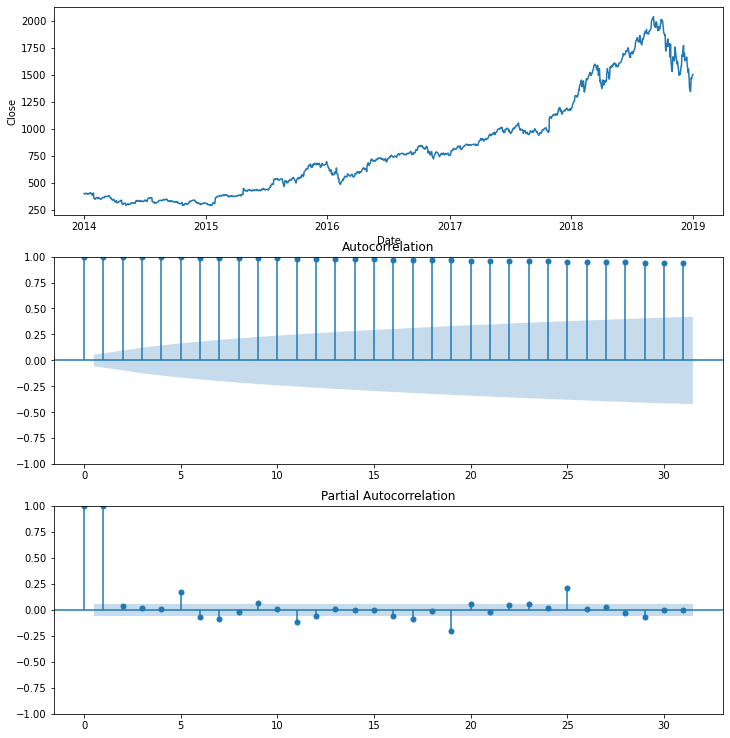

In [22]:
fig, axs = plt.subplots(figsize=(12, 13), nrows=3)
sns.lineplot(data=amzn, x='Date', y='Close', ax=axs[0])
sm.graphics.tsa.plot_acf(x=amzn.Close, ax=axs[1])
sm.graphics.tsa.plot_pacf(x=amzn.Close, ax=axs[2])
;

# 3. 

In [39]:
# a. 
glb_ec = pd.read_csv("data/tsibbledata/global_economy.csv")
tky = glb_ec.query("Country == 'Turkey'")
tky.loc[:, 'GDP_e6'] = tky.GDP * 1/1e6

/tmp/ipykernel_6137/209481963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tky.loc[:, 'GDP_e6'] = tky.GDP * 1/1e6


In [93]:
bcox = pmd.preprocessing.BoxCoxEndogTransformer()
gdp_trans = bcox.fit_transform(tky.GDP_e6)
print(f"num diffs: {pmd.arima.ndiffs(gdp_trans[0])}")
print(f"boxcox lambda: {bcox.lam1_}")

num diffs: 1
boxcox lambda: 0.03601463051033245


In [81]:
vals_ = gdp_trans[0][:-1]
vals = np.concatenate((np.array([np.nan]), vals_), axis=None)
gdp_shift1 = (gdp_trans[0] - vals)

''

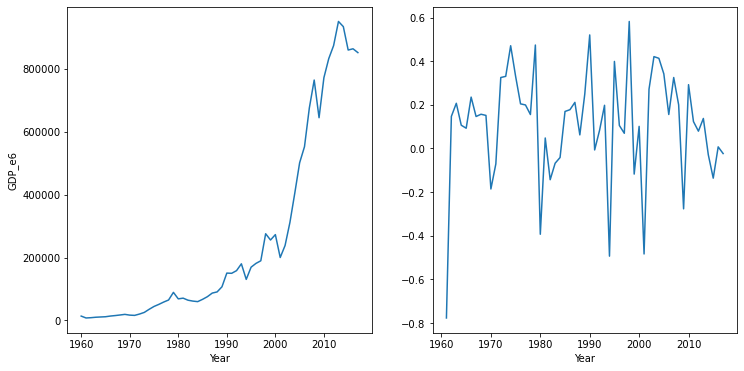

In [83]:
fig, axs = plt.subplots(figsize=(12, 6), ncols=2)

sns.lineplot(data=tky, x='Year', y='GDP_e6', ax=axs[0])
sns.lineplot(x=tky.Year, y=gdp_shift1, ax=axs[1])
;

7. 

In [94]:
air_df = pd.read_csv('data/fpp3/aus_airpassengers.csv')

In [150]:
air_mdl = pmd.auto_arima(air_df.Passengers, seasonal=True)

In [151]:
air_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 -97.019
Date:                Sun, 31 Jul 2022   AIC                            198.038
Time:                        05:38:11   BIC                            201.651
Sample:                             0   HQIC                           199.385
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8963      0.114     -7.842      0.000      -1.120      -0.672
sigma2         4.2120      0.420     10.023      0.000       3.388       5.036
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):               104.43
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):              20.02   Skew:                             1.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
fit = air_mdl.arima_res_

In [153]:
pred = air_mdl.predict(return_conf_int=True)

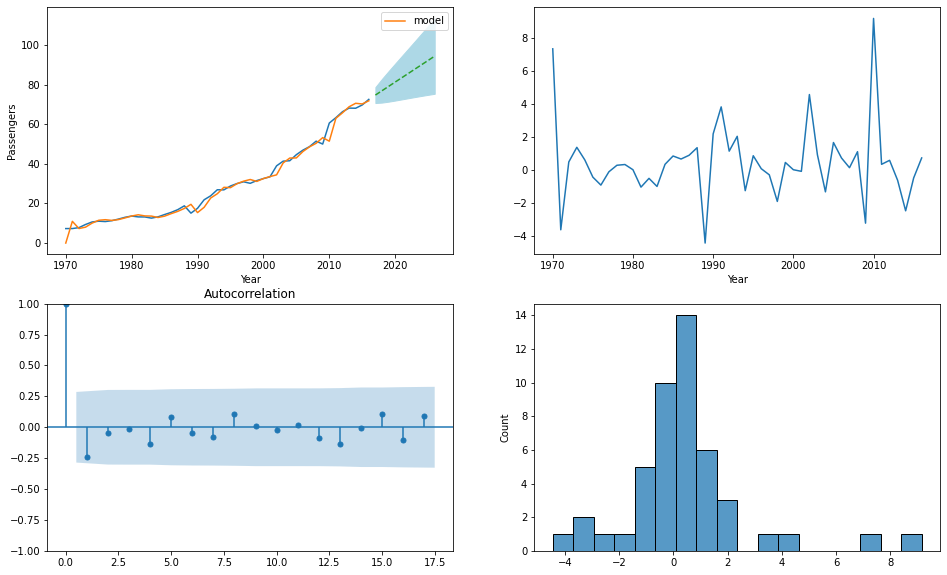

In [154]:
fig, axs = plt.subplots(figsize=(16, 10), ncols=2, nrows=2)
year_pred = np.arange(air_df.Year.max()+1, air_df.Year.max()+11)

sns.lineplot(data=air_df, x="Year", y="Passengers", ax=axs[0][0])
sns.lineplot(x=air_df.Year, y=fit.fittedvalues, ax=axs[0][0], label='model')
axs[0][0].fill_between(x=year_pred, y1=pred[1][:, 0], y2=pred[1][:, 1], color='lightblue')
sns.lineplot(x=year_pred, y=pred[0], ax=axs[0][0], linestyle='--')

sns.lineplot(x=air_df.Year, y=air_mdl.resid(), ax=axs[0][1])
sm.tsa.graphics.plot_acf(air_mdl.resid(), ax=axs[1][0])

sns.histplot(air_mdl.resid(), ax=axs[1][1]);

8. 

In [141]:
glb_ec = pd.read_csv("data/tsibbledata/global_economy.csv")
us_ec = glb_ec.query("Country == 'United States'")

In [ ]:
bcox = pmd.preprocessing.BoxCoxEndogTransformer()
trans = bcox.fit_transform(us_ec.GDP)

In [160]:
us_mdl = pmd.auto_arima(trans[0])

In [161]:
us_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -255.821
Date:                Sun, 31 Jul 2022   AIC                            517.643
Time:                        05:43:36   BIC                            523.772
Sample:                             0   HQIC                           520.025
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.6502      6.438      5.382      0.000      22.033      47.268
ar.L1          0.4673      0.089      5.276      0.000       0.294       0.641
sigma2       460.4271     75.699      6.082      0.000     312.059     608.795
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                12.84
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.85
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [220]:
us_exp_mdl = sm.tsa.ExponentialSmoothing(us_ec.GDP, trend='add', use_boxcox=False)
exp_fit = us_exp_mdl.fit()
sims = exp_fit.simulate(10, repetitions=1000)
ints = np.array((sims.min(axis=1), sims.max(axis=1)))

/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


/usr/local/opt/miniconda3/envs/ds/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


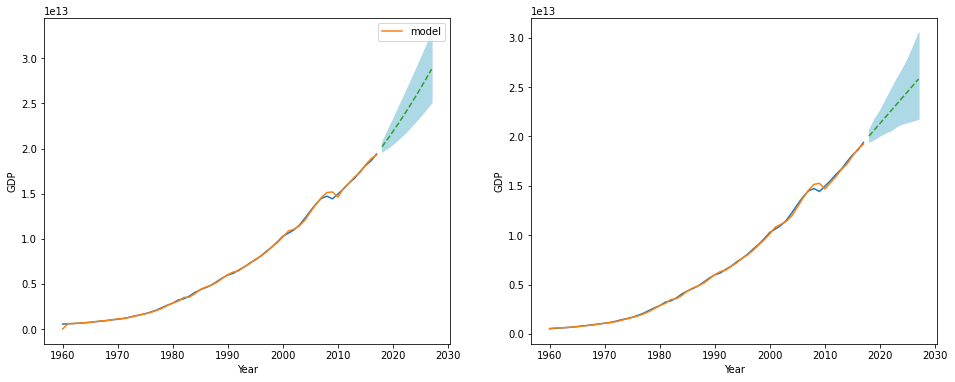

In [224]:
fig, axs = plt.subplots(figsize=(16, 6), ncols=2)

sns.lineplot(data=us_ec, x="Year", y="GDP", ax=axs[0])
pred_vals = bcox.inverse_transform(us_mdl.arima_res_.fittedvalues)
sns.lineplot(x=us_ec.Year, y=pred_vals[0], ax=axs[0], label='model')

year_pred = np.arange(us_ec.Year.max()+1, us_ec.Year.max()+11)

pred_vals = us_mdl.predict(return_conf_int=True)
axs[0].fill_between(year_pred, y1=bcox.inverse_transform(pred_vals[1][:,0])[0], y2=bcox.inverse_transform(pred_vals[1][:,1])[0], color='lightblue')
sns.lineplot(x=year_pred, y=bcox.inverse_transform(pred_vals[0])[0], linestyle='--', ax=axs[0])

sns.lineplot(data=us_ec, x="Year", y="GDP", ax=axs[1])
sns.lineplot(x=us_ec.Year, y=exp_fit.fittedvalues, ax=axs[1])
sns.lineplot(x=year_pred, y=exp_fit.forecast(steps=10), linestyle='--', ax=axs[1])
axs[1].fill_between(x=year_pred, y1=ints[0,:], y2=ints[1,:], color='lightblue');

9. 

In [225]:
aus_arr = pd.read_csv("data/fpp3/aus_arrivals.csv")
aus_arr.Quarter = pd.PeriodIndex(aus_arr.Quarter.replace({" ": "-"}, regex=True), freq="Q")
aus_arr["Q_Stamp"] = aus_arr.Quarter.dt.to_timestamp()

In [233]:
jp_arr = aus_arr.query("Origin == 'Japan'")

In [234]:
jp_arr.head(3)

,Quarter,Origin,Arrivals,Q_Stamp
0,1981Q1,Japan,14763,1981-01-01
1,1981Q2,Japan,9321,1981-04-01
2,1981Q3,Japan,10166,1981-07-01


In [241]:
jp_mdl = pmd.auto_arima(jp_arr.Arrivals, max_p=2, max_q=2, max_P=2, max_Q=2, m=4)

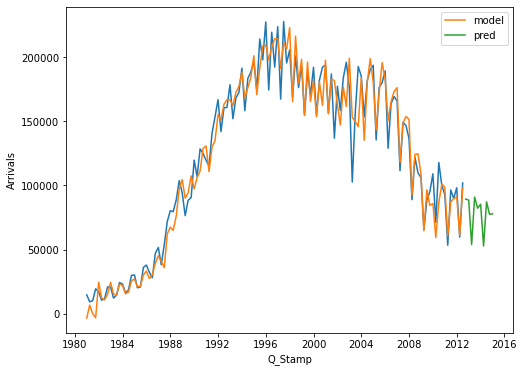

In [274]:
fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(data=jp_arr, x='Q_Stamp', y='Arrivals', ax=ax)
sns.lineplot(x=jp_arr.Q_Stamp, y=jp_mdl.arima_res_.fittedvalues, ax=ax, label='model')
sns.lineplot(x= pd.date_range(start='2012-07-01', periods=11, freq='QS')[1:], y=jp_mdl.predict(), label='pred');